# concatenation of multiple registrations to link data across different images

In [1]:
import ants
import numpy as np
img1 = ants.image_read( ants.get_ants_data('r16') )
img2 = ants.image_read( ants.get_ants_data('r27') )
img3 = ants.image_read( ants.get_ants_data('r64') )

Segment image 1 and map this to image3 by way of image2.

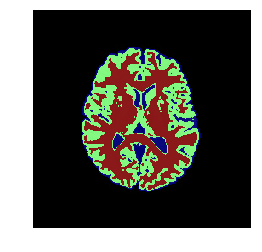

In [2]:
seg1 = ants.kmeans_segmentation( img1, 3 )
ants.plot( img1, seg1['segmentation'] )

Compute quick registrations with SyN.

In [3]:
reg12 = ants.registration( img1, img2, 'SyN', reg_iterations = [100,100,20] )
reg23 = ants.registration( img2, img3, 'SyN', reg_iterations = [100,100,20] )

We concatenate the transformations.

In [7]:
mytx = reg23[ 'invtransforms'] + reg12[ 'invtransforms'] 

Apply the concatentated transformations, taking care to invert appropriately.

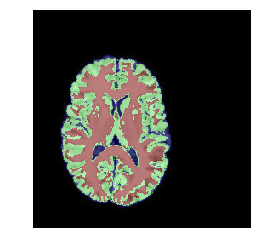

In [8]:
mywarpedimage = ants.apply_transforms( fixed = img3, 
                                       moving = seg1['segmentation'] , 
                                       transformlist = mytx, 
                                       interpolator  = 'nearestNeighbor', 
                                       whichtoinvert = [True,False,True,False])
ants.plot( img3, mywarpedimage, overlay_alpha = 0.5 )